In [1]:
from helper.util_network import construct_ind_network, merge_centrality, merge_party

## Construct issue-based networks based on speech csv data

In [2]:
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import os

directory = 'data/issue-based networks/'
networks = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        networks[filename[:-4]] = pd.read_csv(f"{directory}/{filename}", names = ['legislator'])['legislator'].to_list()

In [3]:
networks.keys()

dict_keys(['education', 'child', 'health_care', 'bankruptcy', 'covid', 'rights', 'business', 'abortion', 'syria', 'ukraine'])

In [4]:
issue_network = construct_ind_network(networks)

## Explore the network (edge, nodes, density, clustering)

In [5]:
import networkx as nx
g = nx.DiGraph()
g.add_nodes_from(issue_network.keys())
for k, v in issue_network.items():
    g.add_edges_from(([(k, t) for t in v if (t, k) not in g.edges()]))

In [6]:
print(nx.info(g))

DiGraph with 411 nodes and 60278 edges


In [7]:
nx.density(g)

0.35771170850394635

In [8]:
nx.average_clustering(g)

0.4361565930471394

## Calculate centrality measure for each legislator

In [15]:
bc_df = pd.DataFrame.from_dict(bc, orient='index')
bc_df.reset_index(inplace=True)
bc_df = bc_df.rename(columns={"index": "index", 0: " bc"})
ec_df = pd.DataFrame.from_dict(ec, orient='index')
ec_df.reset_index(inplace=True)
ec_df = ec_df.rename(columns={"index": "index", 0: " ec"})
dc_df = pd.DataFrame.from_dict(dc, orient='index')
dc_df.reset_index(inplace=True)
dc_df = dc_df.rename(columns={"index": "index", 0: " dc"})
cc_df = pd.DataFrame.from_dict(cc, orient='index')
cc_df.reset_index(inplace=True)
cc_df = cc_df.rename(columns={"index": "index", 0: " cc"})

In [37]:
df_analysis = pd.read_csv("data/final_analysis.csv")
df_analysis

,Legislator name,Connections,Legislative Effectiveness Score,bc,ec,cc,dc,Gender Estimates,Predicted Gender,Ethnicity Estimates,Predicted Ethnicity
0,Jack Reed,"['Kirsten Gillibrand', 'Tammy Duckworth', 'Joe...",0.346327,0.001776,-2.735437e-18,0.000000,0.117329,"{'male': 0.11446011411247371, 'female': 0.0052...",male,"{'black': 7.499493095967334e-05, 'hispanic': 0...",white
1,Kirsten Gillibrand,"['Jack Reed', 'Tammy Duckworth', 'Joe Manchin ...",0.338763,0.001780,-3.847979e-18,0.001805,0.108303,"{'male': 0.00012182432734851284, 'female': 0.0...",female,"{'black': 0.003963606191111235, 'hispanic': 0....",white
2,Tammy Duckworth,"['Jack Reed', 'Kirsten Gillibrand', 'Joe Manch...",1.529729,0.001784,1.935271e-18,0.003610,0.115523,"{'male': 0.0004337136509202721, 'female': 6.94...",male,"{'black': 1.2556225757797129e-05, 'hispanic': ...",white
3,Gary Peters,"['Jack Reed', 'Kirsten Gillibrand', 'Tammy Duc...",5.015463,0.002253,1.736047e-17,0.007220,0.119134,"{'male': 0.001414442399211089, 'female': 5.194...",male,"{'black': 5.488973188361489e-05, 'hispanic': 0...",white
4,Elizabeth Warren,"['Jack Reed', 'Kirsten Gillibrand', 'Tammy Duc...",0.725357,0.001796,2.013190e-17,0.009025,0.111913,"{'male': 8.072211954203494e-05, 'female': 0.98...",female,"{'black': 1.2343688431685863e-05, 'hispanic': ...",white
...,...,...,...,...,...,...,...,...,...,...,...
476,Gary Palmer,"['Peter DeFazio', 'Grace Napolitano', 'Donald ...",1.086954,0.001707,1.510191e-01,0.398346,0.117329,"{'male': 0.06688244777941647, 'female': 0.0001...",male,"{'black': 1.7538554292170157e-05, 'hispanic': ...",white
477,Randy Weber,"['Peter DeFazio', 'Grace Napolitano', 'Donald ...",0.069581,0.001724,1.976157e-01,0.438368,0.171480,"{'male': 0.11301501154153658, 'female': 0.0001...",male,"{'black': 2.5656831556824548e-05, 'hispanic': ...",white
478,Brian Babin,"['Peter DeFazio', 'Grace Napolitano', 'Donald ...",0.562175,0.001724,2.658546e-01,0.440947,0.171480,"{'male': 0.00017225489122579384, 'female': 0.0...",female,"{'black': 1.638852910317999e-05, 'hispanic': 0...",white
479,John A. Yarmuth,"['Robert C. Scott', 'Jan Schakowsky', 'David P...",1.223520,0.001727,8.349277e-02,0.412778,0.055957,"{'male': 0.004795478958044669, 'female': 0.000...",male,"{'black': 0.01566683526845134, 'hispanic': 0.0...",white


In [38]:
df_analysis = df_analysis.drop(['Connections', ' bc', ' ec', ' cc', ' dc'], axis=1)

In [39]:
df_analysis = merge_centrality(df_analysis, bc_df)
df_analysis = merge_centrality(df_analysis, ec_df)
df_analysis = merge_centrality(df_analysis, cc_df)
df_analysis = merge_centrality(df_analysis, dc_df)
df_analysis = df_analysis.drop(columns=['index_x', 'index_y', 'index_x', 'index_y'])

/Users/lidang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [40]:
df_analysis.to_csv("data/issue_analysis.csv")

In [41]:
df_analysis

,Legislator name,Legislative Effectiveness Score,Gender Estimates,Predicted Gender,Ethnicity Estimates,Predicted Ethnicity,bc,ec,cc,dc
0,Jack Reed,0.346327,"{'male': 0.11446011411247371, 'female': 0.0052...",male,"{'black': 7.499493095967334e-05, 'hispanic': 0...",white,0.002568,4.253542e-12,0.307635,0.575610
1,Kirsten Gillibrand,0.338763,"{'male': 0.00012182432734851284, 'female': 0.0...",female,"{'black': 0.003963606191111235, 'hispanic': 0....",white,0.002604,2.494975e-12,0.299322,0.700000
2,Tammy Duckworth,1.529729,"{'male': 0.0004337136509202721, 'female': 6.94...",male,"{'black': 1.2556225757797129e-05, 'hispanic': ...",white,0.002439,1.885265e-01,0.704411,0.624390
3,Gary Peters,5.015463,"{'male': 0.001414442399211089, 'female': 5.194...",male,"{'black': 5.488973188361489e-05, 'hispanic': 0...",white,0.002935,5.855565e-04,0.637629,0.687805
4,Elizabeth Warren,0.725357,"{'male': 8.072211954203494e-05, 'female': 0.98...",female,"{'black': 1.2343688431685863e-05, 'hispanic': ...",white,0.002457,2.596438e-01,0.711166,0.624390
...,...,...,...,...,...,...,...,...,...,...
476,Gary Palmer,1.086954,"{'male': 0.06688244777941647, 'female': 0.0001...",male,"{'black': 1.7538554292170157e-05, 'hispanic': ...",white,0.002427,7.452039e-03,0.582328,0.458537
477,Randy Weber,0.069581,"{'male': 0.11301501154153658, 'female': 0.0001...",male,"{'black': 2.5656831556824548e-05, 'hispanic': ...",white,0.002834,1.315383e-12,0.290531,0.753659
478,Brian Babin,0.562175,"{'male': 0.00017225489122579384, 'female': 0.0...",female,"{'black': 1.638852910317999e-05, 'hispanic': 0...",white,0.003000,3.056504e-05,0.634552,0.856098
479,John A. Yarmuth,1.223520,"{'male': 0.004795478958044669, 'female': 0.000...",male,"{'black': 0.01566683526845134, 'hispanic': 0.0...",white,NaN,NaN,NaN,NaN


## Add party affiliation for each legislator

In [42]:
import pandas as pd
import fuzzy_pandas as fpd

house = pd.read_excel("data/House116.xlsx")
senate = pd.read_excel("data/Senate116.xlsx")
house = house[['Legislator name', 'party']]
senate = senate[['Legislator name', 'party']]
df_les = pd.concat([house, senate], axis=0)

In [47]:
df_analysis = merge_party(df_analysis, df_les)
df_analysis

,Legislator name,Legislative Effectiveness Score,Gender Estimates,Predicted Gender,Ethnicity Estimates,Predicted Ethnicity,bc,ec,cc,dc,party
0,Jack Reed,0.346327,"{'male': 0.11446011411247371, 'female': 0.0052...",male,"{'black': 7.499493095967334e-05, 'hispanic': 0...",white,0.002568,4.253542e-12,0.307635,0.575610,D
1,Kirsten Gillibrand,0.338763,"{'male': 0.00012182432734851284, 'female': 0.0...",female,"{'black': 0.003963606191111235, 'hispanic': 0....",white,0.002604,2.494975e-12,0.299322,0.700000,D
2,Tammy Duckworth,1.529729,"{'male': 0.0004337136509202721, 'female': 6.94...",male,"{'black': 1.2556225757797129e-05, 'hispanic': ...",white,0.002439,1.885265e-01,0.704411,0.624390,D
3,Gary Peters,5.015463,"{'male': 0.001414442399211089, 'female': 5.194...",male,"{'black': 5.488973188361489e-05, 'hispanic': 0...",white,0.002935,5.855565e-04,0.637629,0.687805,D
4,Elizabeth Warren,0.725357,"{'male': 8.072211954203494e-05, 'female': 0.98...",female,"{'black': 1.2343688431685863e-05, 'hispanic': ...",white,0.002457,2.596438e-01,0.711166,0.624390,D
...,...,...,...,...,...,...,...,...,...,...,...
476,Gary Palmer,1.086954,"{'male': 0.06688244777941647, 'female': 0.0001...",male,"{'black': 1.7538554292170157e-05, 'hispanic': ...",white,0.002427,7.452039e-03,0.582328,0.458537,R
477,Randy Weber,0.069581,"{'male': 0.11301501154153658, 'female': 0.0001...",male,"{'black': 2.5656831556824548e-05, 'hispanic': ...",white,0.002834,1.315383e-12,0.290531,0.753659,R
478,Brian Babin,0.562175,"{'male': 0.00017225489122579384, 'female': 0.0...",female,"{'black': 1.638852910317999e-05, 'hispanic': 0...",white,0.003000,3.056504e-05,0.634552,0.856098,R
479,John A. Yarmuth,1.223520,"{'male': 0.004795478958044669, 'female': 0.000...",male,"{'black': 0.01566683526845134, 'hispanic': 0.0...",white,NaN,NaN,NaN,NaN,NaN


## Visualization of the full network

In [48]:
import matplotlib.pyplot as plt
g_full = nx.Graph()
for k,v in issue_network.items():
    for conn in v:
        if (conn, k) not in g_full.edges():
            g_full.add_edge(k, conn)

In [49]:
color_map = ['red' if df_analysis.loc[df_analysis['Legislator name'] == n]['party'].tolist() == ['R'] else 'blue' for n in g_full]   

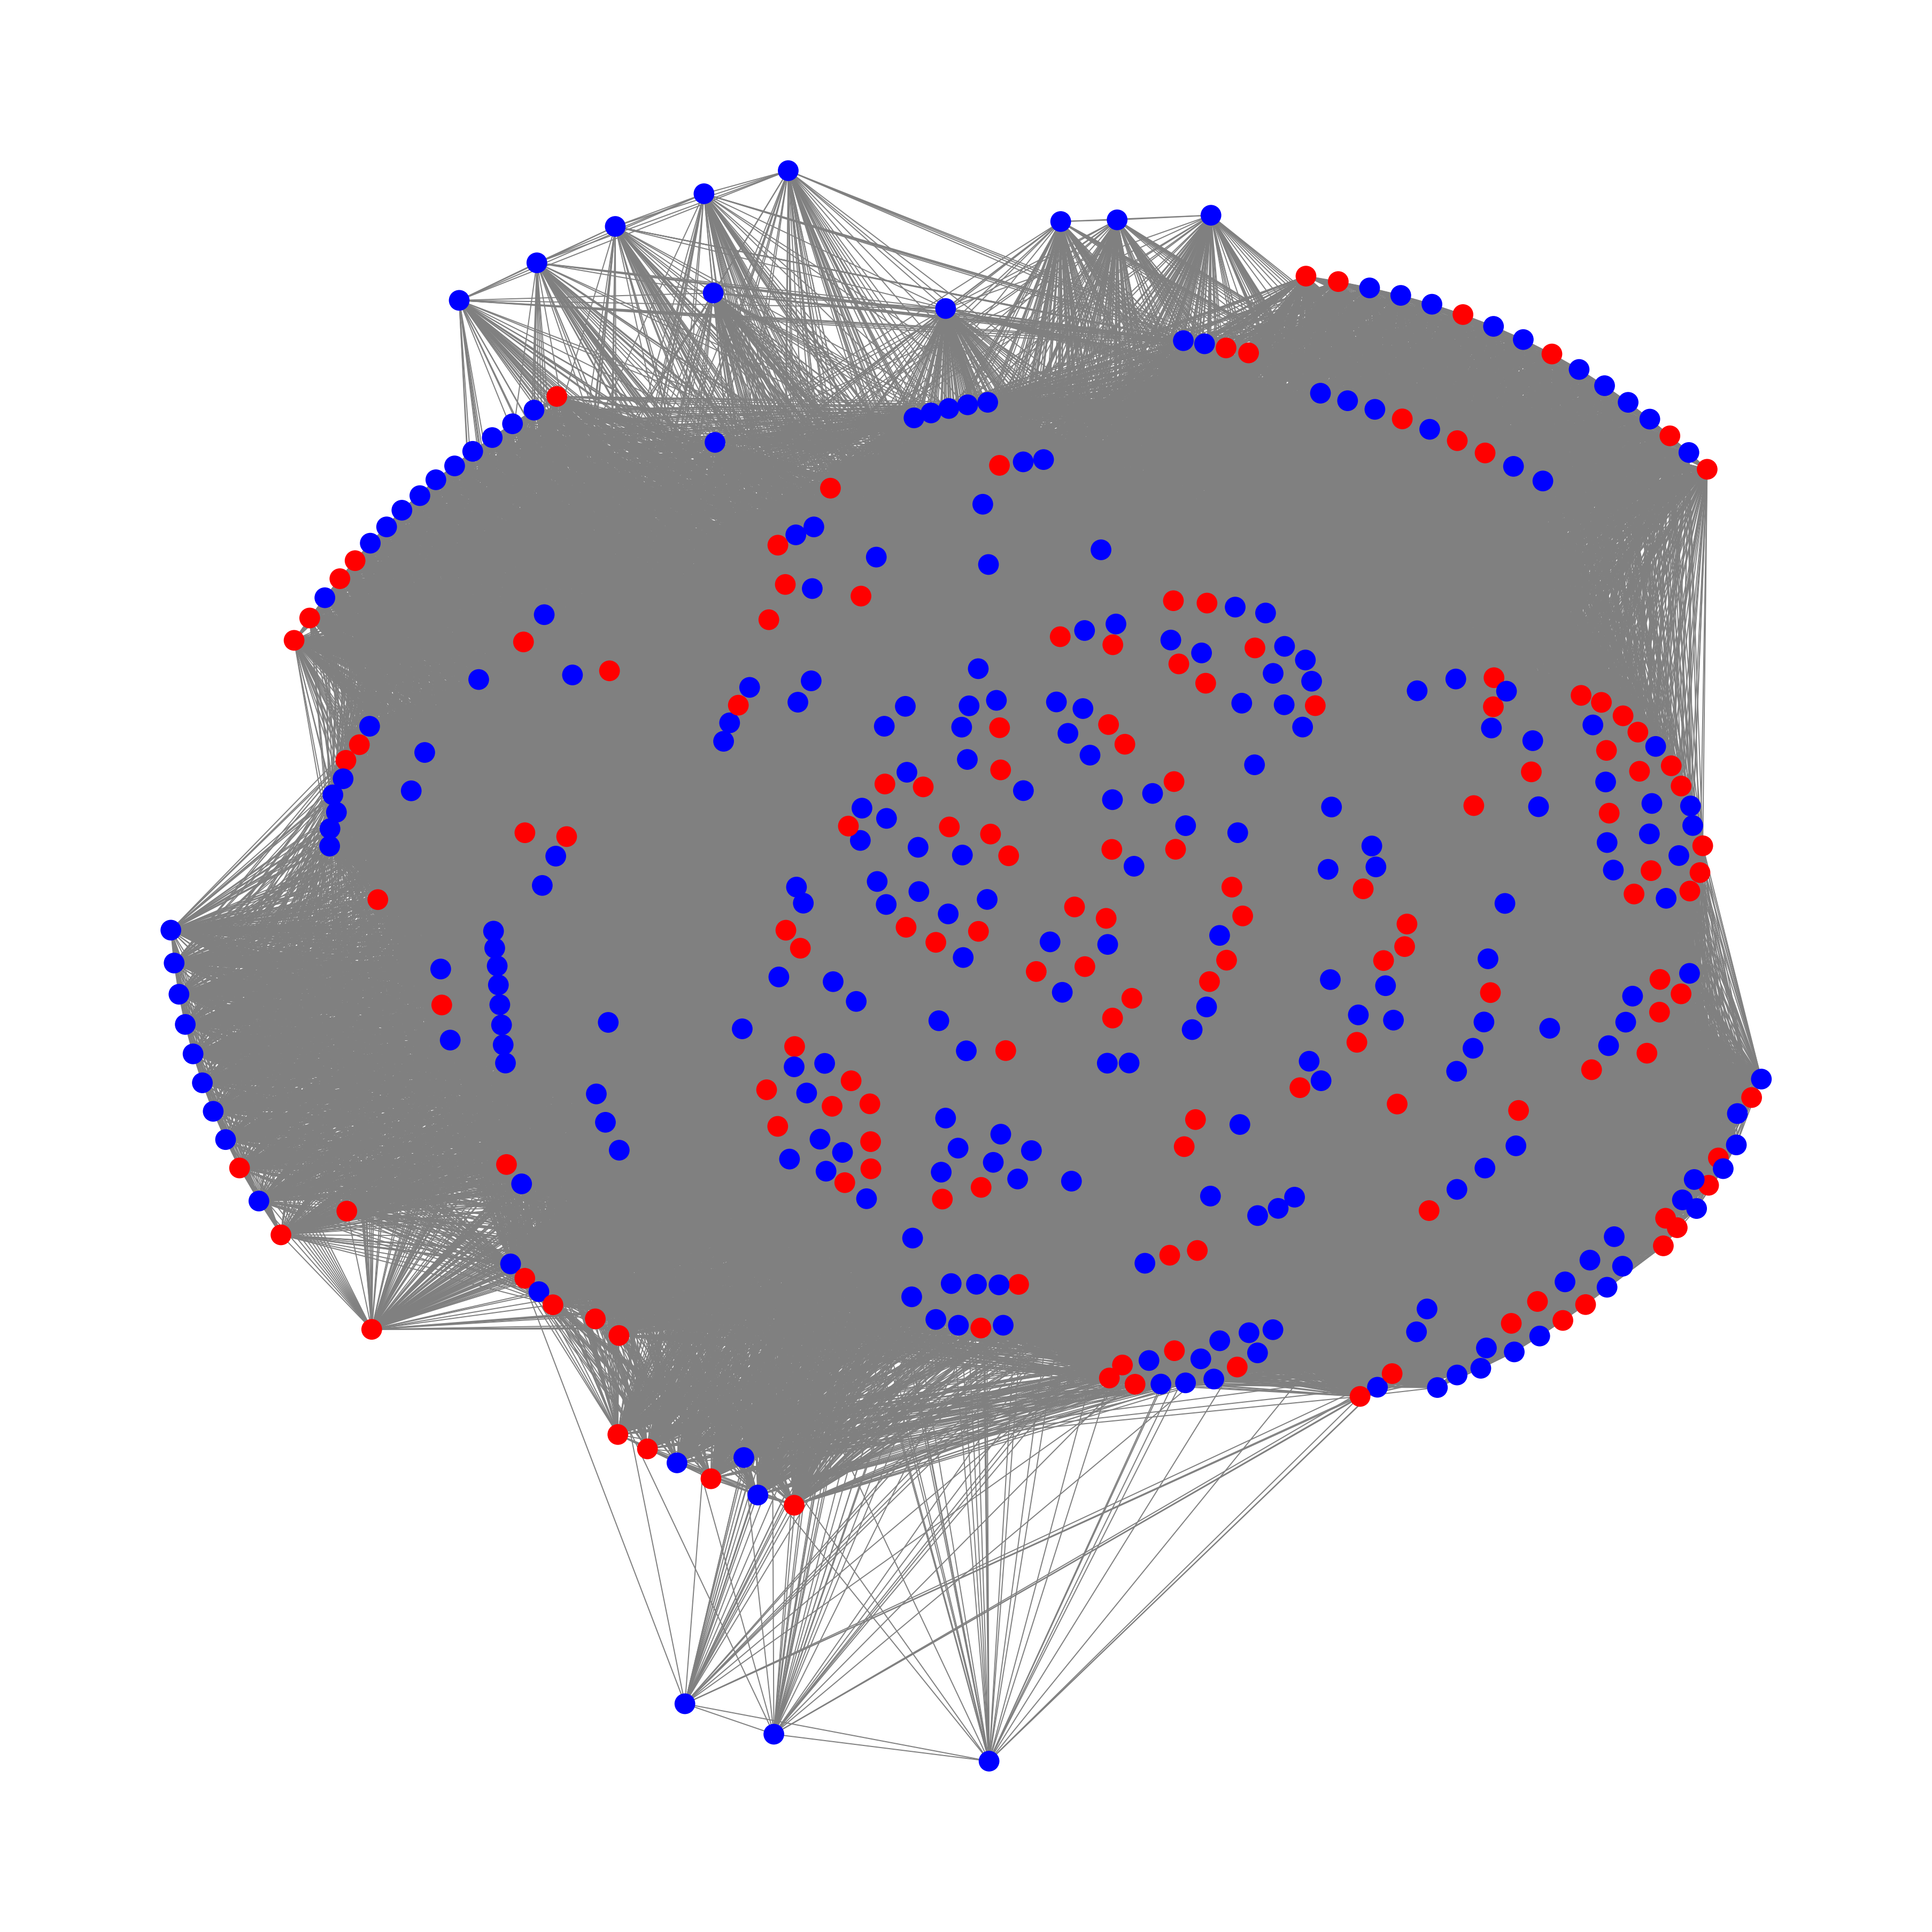

In [50]:
plt.figure(3,figsize=(50,50)) 
nx.draw(g_full, nx.kamada_kawai_layout(g), node_size=1500, node_shape="o", linewidths=0.0000000000000000000000000000000001, font_size=20, 
        font_color="black", font_weight="normal", node_color=color_map, width=2, edge_color="grey")

plt.show()